In [15]:
import os
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook, push_notebook
from bokeh.models import HoverTool, CustomJS, Slider, ColumnDataSource
from bokeh.layouts import row, column, gridplot
import trackpy as tp
from scipy.optimize import curve_fit
from scipy.ndimage.filters import gaussian_filter
from scipy.ndimage import label
from PIL import Image

output_notebook()
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(50, 50))
mpl.rc('image', cmap='viridis')
plt.style.use('ggplot')
mpl.rc('xtick', labelsize=42)
mpl.rc('ytick', labelsize=42)
mpl.rcParams['font.size'] = 42

Loading BokehJS ...

In [103]:
file_dir = 'C:\\Users\\aquiles\\Data\\2018-07-17\\Meas_5V_20Hz'

In [107]:
filenames = os.listdir(file_dir)

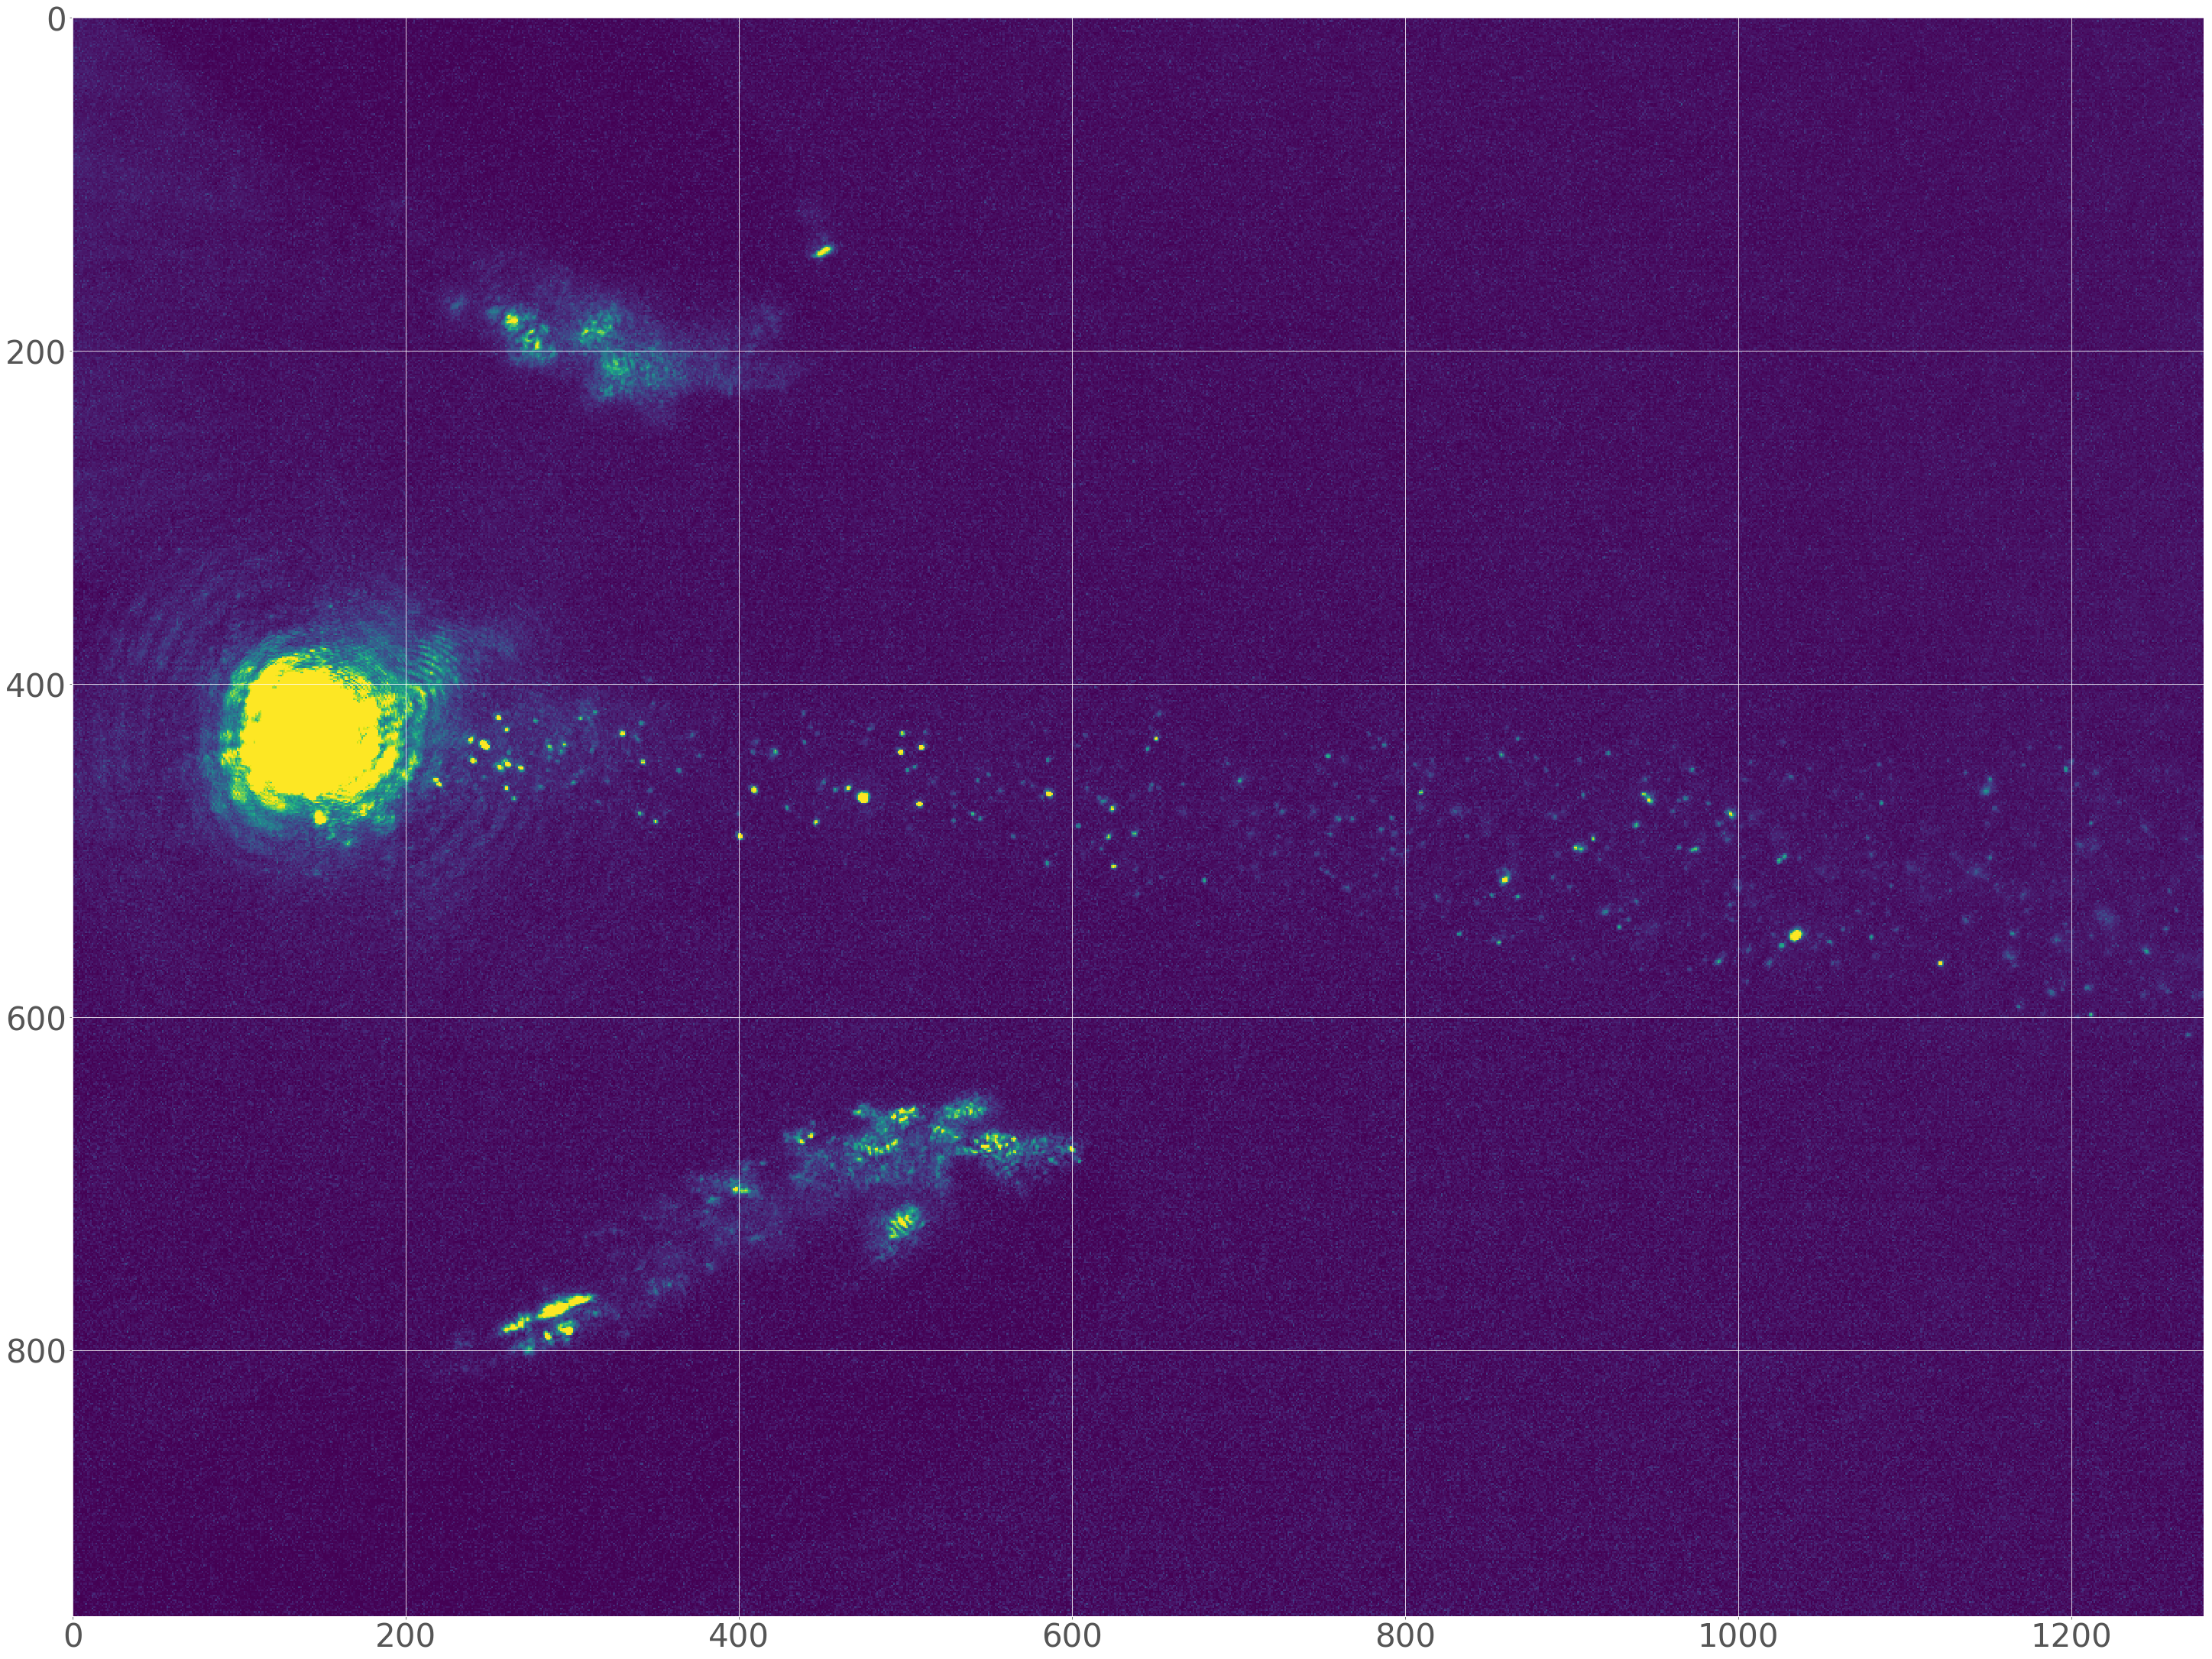

In [82]:
im = Image.open(os.path.join(file_dir, filenames[1]))
img = np.array(im)
plt.imshow(img)

In [70]:
p = figure(x_range=(1, 300), y_range=(1, 250))
hover = HoverTool(tooltips=[("x", "$x"), ("y", "$y"), ("value", "@image")])
p.add_tools(hover)
source = ColumnDataSource(data=dict(image=[img]))
p.image(image='image', x=1, y=1, dw=300, dh=250, source=source, palette="Spectral11")
show(p)

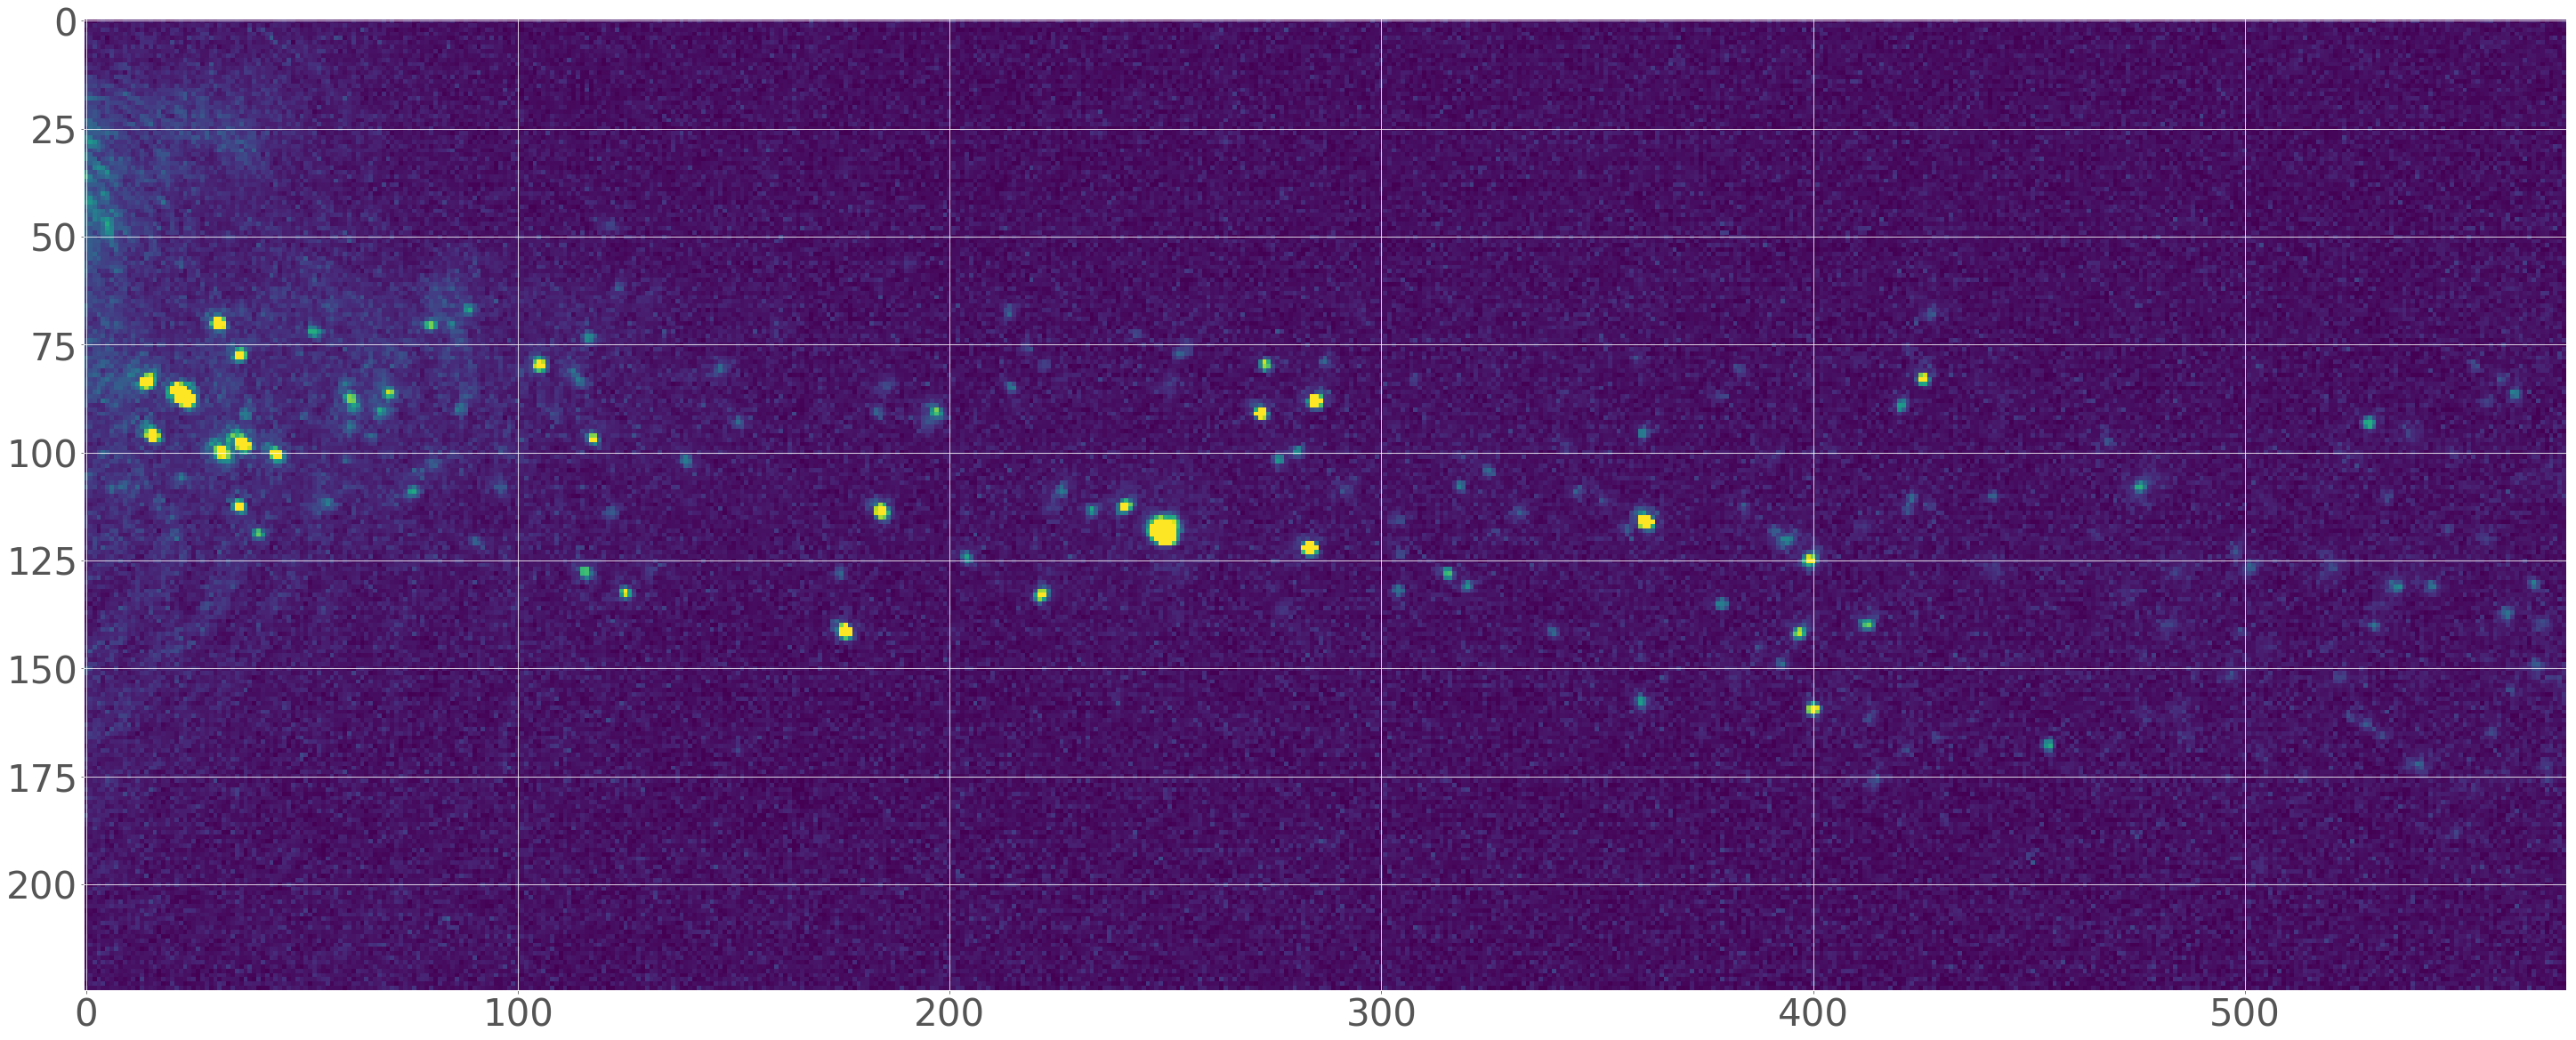

In [83]:
plt.imshow(img[350:575,225:800])

In [108]:
imlist = []
for filename in filenames:
    im = Image.open(os.path.join(file_dir, filename))
    img = np.array(im)
    img = img[350:575,225:800]
    imlist.append(Image.fromarray(img))

ValueError: tile cannot extend outside image

In [85]:
imlist[0].save(os.path.join(file_dir,"Meas_5V_20Hz.tif"), compression="tiff_deflate", save_all=True,
               append_images=imlist[1:])

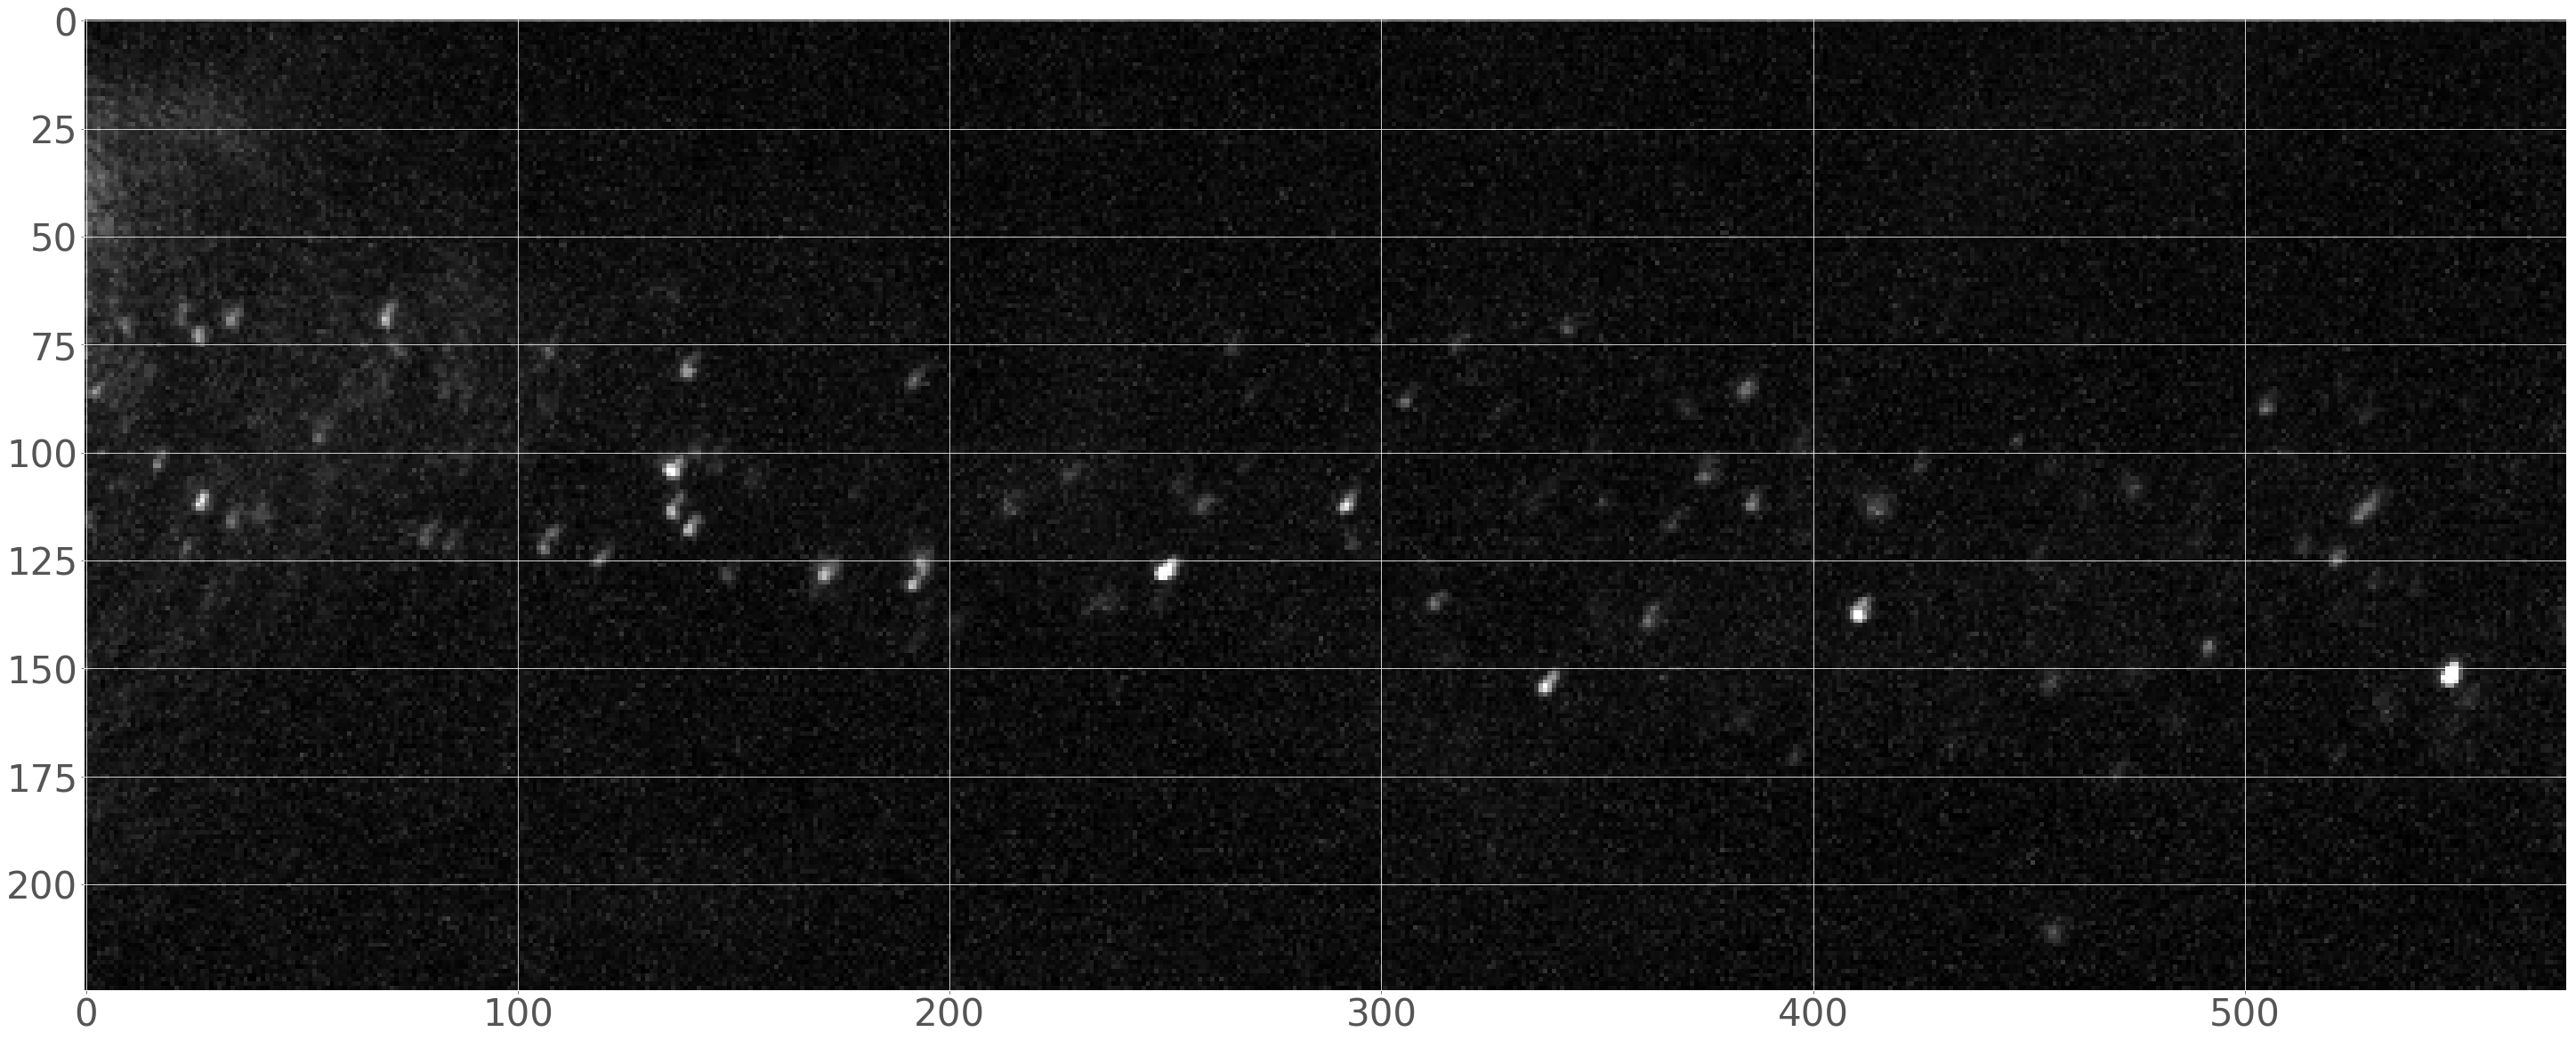

In [48]:
plt.imshow(imlist[222])

In [65]:
img_to_analize = np.zeros((225,575,1))
for i in range(217,223):
    img_to_analize = np.dstack((img_to_analize,np.array(imlist[i])))

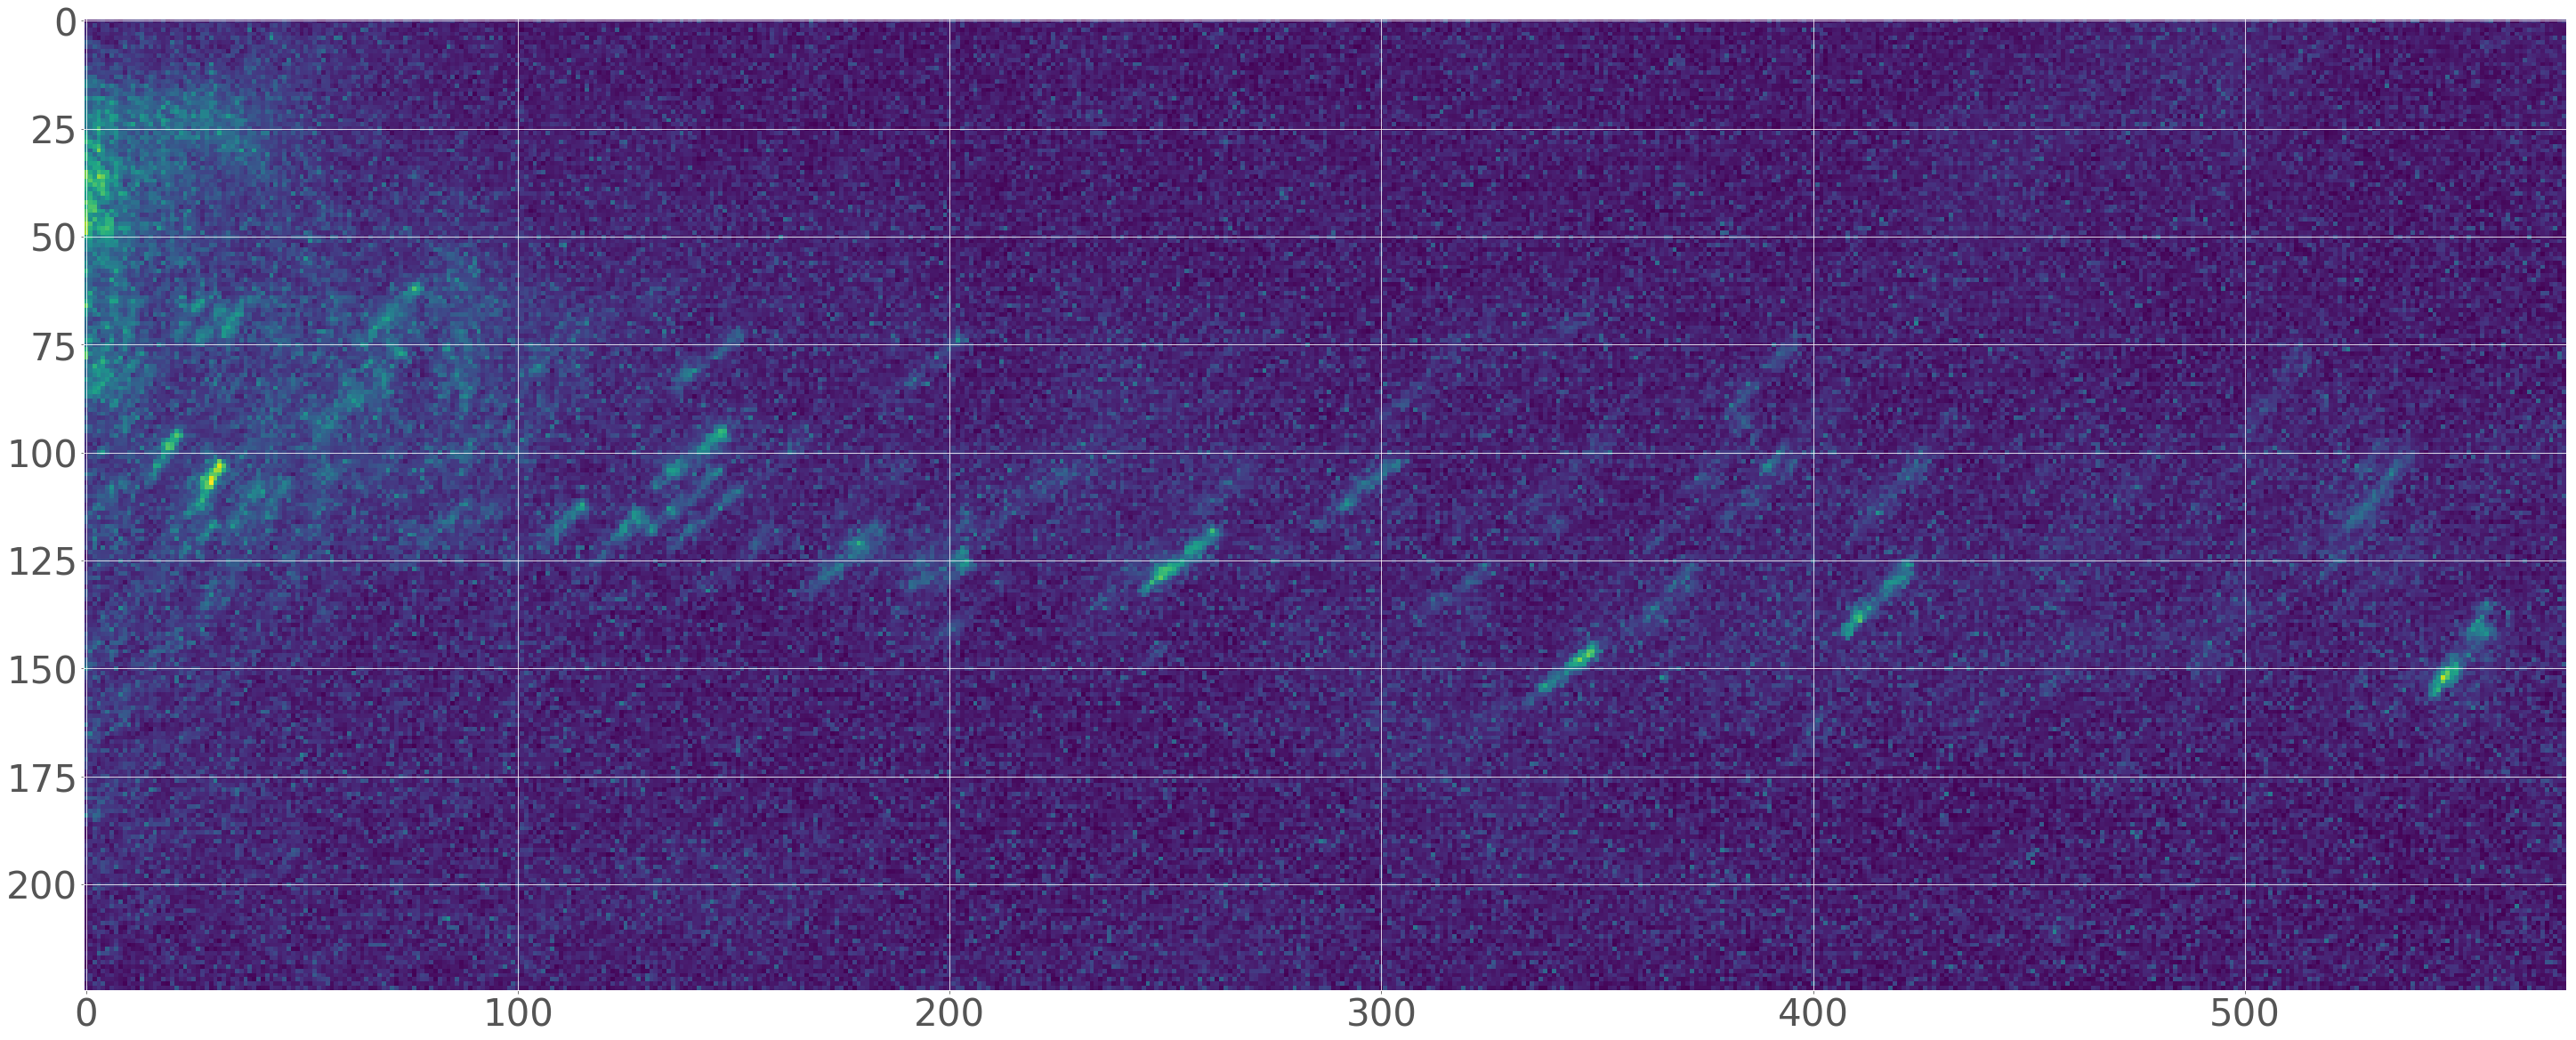

In [87]:
sumed_image = np.sum(img_to_analize,2)
plt.imshow(sumed_image)
# plt.colorbar()

In [54]:
imlist[217].size

(575, 225)

In [92]:
img_to_analize = img_to_analize[:,:,1:]

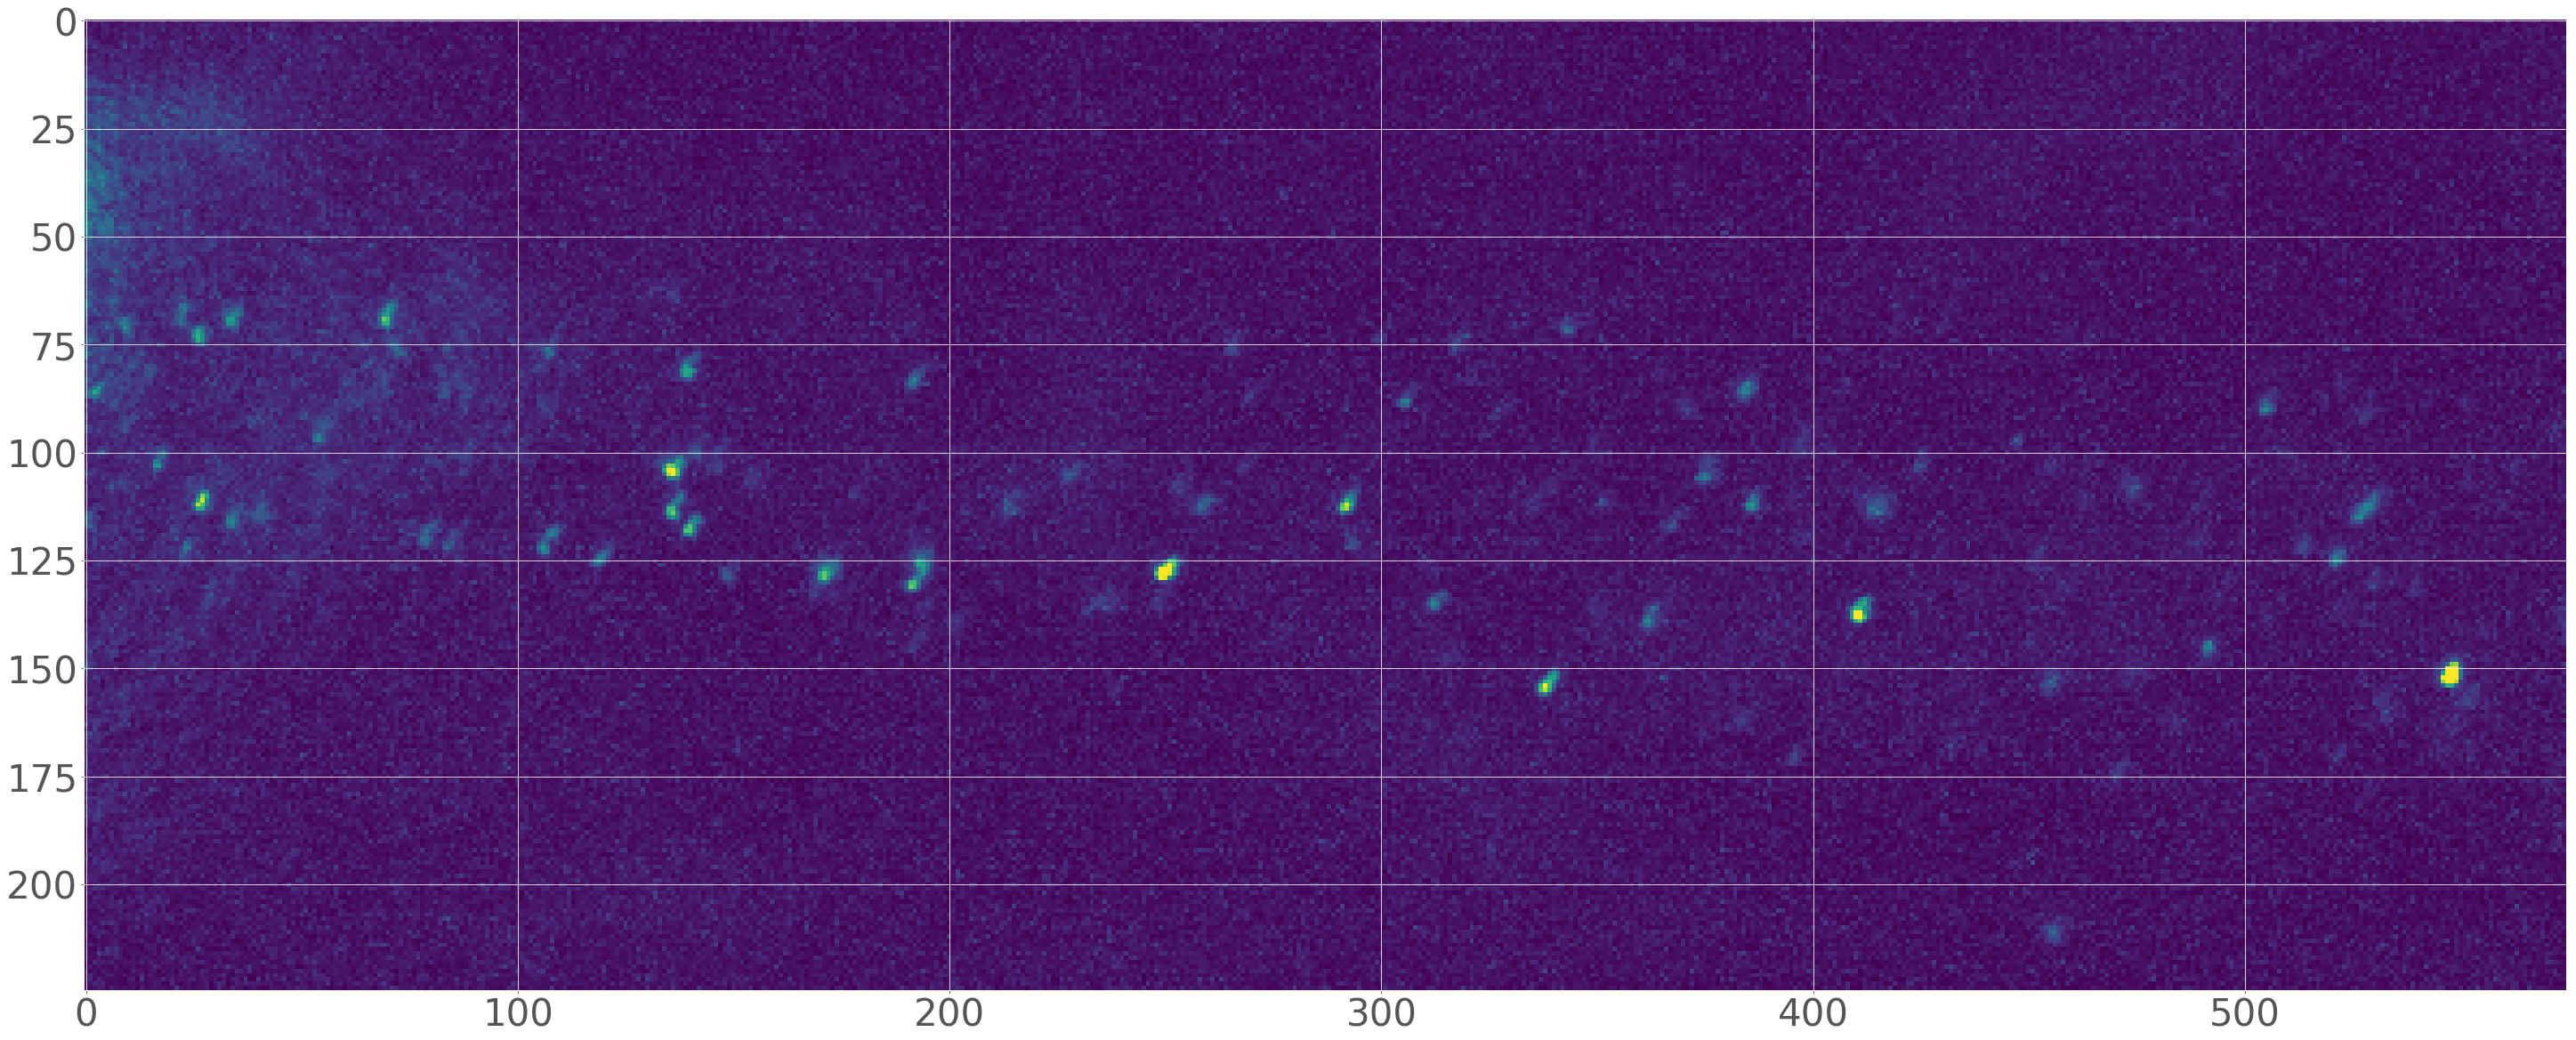

In [102]:
plt.imshow(img_to_analize[:,:,5])

In [106]:
imlist = []
for i in range(img_to_analize.shape[2]):
    img = img_to_analize[:,:,i]
    imlist.append(Image.fromarray(img))
    
imlist[0].save(os.path.join(file_dir,"Cropped_Frames.tif"), compression="tiff_deflate", save_all=True,
               append_images=imlist[1:])

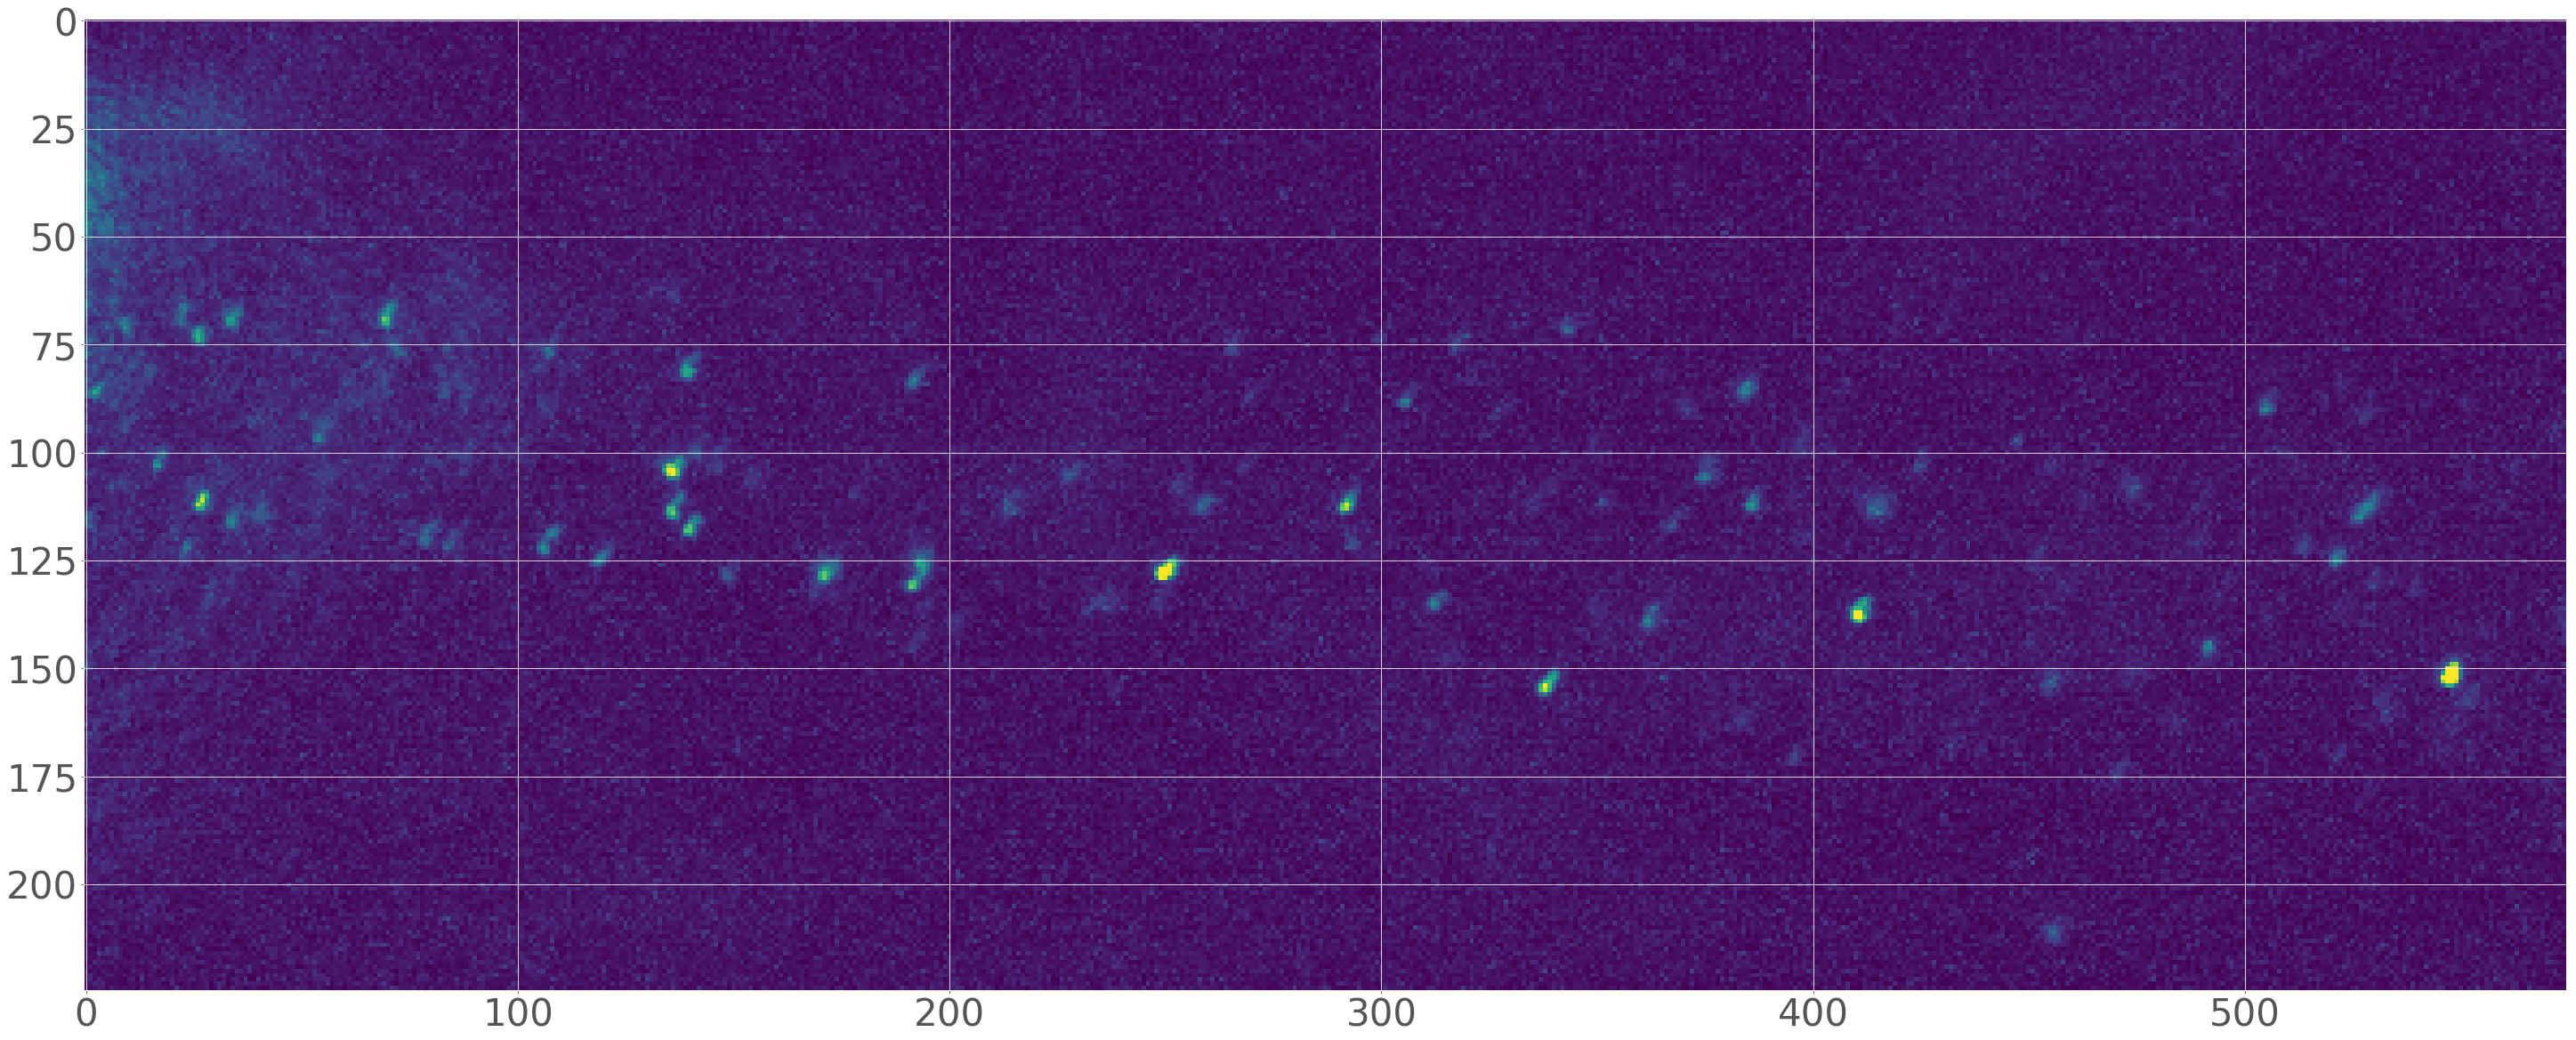

In [105]:
plt.imshow(img)

In [111]:
new_imlist = imlist[217:223]

In [117]:
new_imlist[1].save(os.path.join(file_dir, 'EM.tif'), compression="tiff_deflate", save_all=True, append_iamges=new_imlist[1:])

In [116]:
len(new_imlist)

6

In [118]:
imlist[217].save(os.path.join(file_dir,"EM.tif"), compression="tiff_deflate", save_all=True,
               append_images=imlist[218:223])